In [165]:
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap,geom_line
from scipy.stats import trim_mean

In [3]:
pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option("display.max_rows", None, "display.max_columns", 60, 'display.width', 1000)

In [5]:
dir_ = '/Users/petern/Desktop/Python/Data_Analyst_Test/Finhay/' #Tên folder
directory = os.listdir(dir_)

In [6]:
finhay_df = pd.read_excel('Dummy Data for Technical Test.xlsx')

/Users/petern/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

In [7]:
finhay_df.head(5)

,ID,Invest,Saving,DoB,Gender,City,Date
0,376723,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:01:55
1,376724,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:02:24
2,376725,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:07:50
3,376726,NaN,NaN,1995-09-27,Male,Bình Dương,2020-04-01 00:10:43
4,376727,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:12:17


In [8]:
finhay_df.shape

(95502, 7)

In [9]:
finhay_df.isnull().any()

ID        False
Invest     True
Saving     True
DoB        True
Gender     True
City       True
Date      False
dtype: bool

In [10]:
finhay_df.isna().any()

ID        False
Invest     True
Saving     True
DoB        True
Gender     True
City       True
Date      False
dtype: bool

In [11]:
finhay_df['Invest'].isna().sum()

80009

In [12]:
finhay_df['Invest'].isnull().sum()

80009

In [13]:
finhay_df['Saving'].isna().sum()

90528

In [14]:
finhay_df['Saving'].isnull().sum()

90528

In [15]:
finhay_df['DoB'].isna().sum()

70546

In [16]:
finhay_df['Gender'].isna().sum()

70613

In [17]:
finhay_df['City'].isna().sum()

73030

In [22]:
count_row_na_3 = 0
for i in finhay_df.index:
    count_na = finhay_df.loc[i,['DoB','Gender','City']].isna().sum()
    if (count_na == 3):
        count_row_na_3 += 1
print(count_row_na_3)

68606


In [23]:
count_row_na_5 = 0
for i in finhay_df.index:
    count_na = finhay_df.loc[i,['Invest','Saving','DoB','Gender','City']].isna().sum()
    if (count_na == 5):
        count_row_na_5 += 1
print(count_row_na_5)

66853


# There are many missing data more than 70%

In [24]:
(count_row_na_5/finhay_df.shape[0])*100

70.00167535758413

In [25]:
finhay_df.describe()

,ID,Invest,Saving
count,"95,502.00","15,493.00","4,974.00"
mean,"424,473.83","2,275,128.62","19,178,754.09"
std,"27,569.61","15,470,571.40","66,163,660.95"
min,"376,723.00",373.00,"2,233.00"
25%,"400,598.25","100,000.00","1,002,562.75"
50%,"424,473.50","250,000.00","5,005,070.00"
75%,"448,349.75","1,020,000.00","15,000,000.00"
max,"472,226.00","1,100,000,000.00","2,700,000,000.00"


In [26]:
finhay_full = finhay_df.dropna()

In [27]:
finhay_full.shape

(3350, 7)

In [28]:
finhay_full.head()

,ID,Invest,Saving,DoB,Gender,City,Date
28,376751,"1,070,000.00","1,009,980.00",2000-09-19,Female,Kiên Giang,2020-04-01 00:36:22
86,376809,"4,970,000.00","3,870,293.00",1990-11-07,Male,Lào Cai,2020-04-01 01:47:44
160,376883,"20,012,165.00","20,000,000.00",1991-06-20,Male,Hà Nội,2020-04-01 05:48:42
591,377314,"1,255,000.00","50,000.00",1991-07-04,Male,Đồng Nai,2020-04-01 12:11:27
723,377446,"200,000.00","1,000,000.00",1995-07-12,Female,Cần Thơ,2020-04-01 13:16:39


In [29]:
finhay_full.dtypes

ID          int64
Invest    float64
Saving    float64
DoB        object
Gender     object
City       object
Date       object
dtype: object

In [31]:
finhay_full.loc[finhay_full.ID.index, 'Date_Birth'] = pd.to_datetime(finhay_full['DoB'], errors = 'coerce')

/Users/petern/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/petern/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
finhay_full.loc[finhay_full.ID.index, 'Date_join'] = pd.to_datetime(finhay_full['Date'])

In [33]:
finhay_full[finhay_full['Date_Birth'].isna()]

,ID,Invest,Saving,DoB,Gender,City,Date,Date_Birth,Date_join
24887,401610,"2,500,000.00","3,001,824.00",0007-12-08,Female,Nghệ An,2020-04-09 19:33:03,NaT,2020-04-09 19:33:03
89327,466051,"100,000.00","200,000.00",2514-04-26,Female,Cao Bằng,2020-04-26 17:46:17,NaT,2020-04-26 17:46:17
93505,470230,"200,000.00","300,000.00",0013-05-20,Female,Đà Nẵng,2020-04-29 11:29:27,NaT,2020-04-29 11:29:27


In [34]:
finhay_full = finhay_full.dropna()

In [39]:
now = pd.Timestamp('now')
finhay_full.loc[finhay_full.index,'age'] = (now - finhay_full['Date_Birth']).astype('<m8[Y]') 

In [40]:
finhay_full.head()

,ID,Invest,Saving,DoB,Gender,City,Date,Date_Birth,Date_join,age
28,376751,"1,070,000.00","1,009,980.00",2000-09-19,Female,Kiên Giang,2020-04-01 00:36:22,2000-09-19,2020-04-01 00:36:22,20.00
86,376809,"4,970,000.00","3,870,293.00",1990-11-07,Male,Lào Cai,2020-04-01 01:47:44,1990-11-07,2020-04-01 01:47:44,30.00
160,376883,"20,012,165.00","20,000,000.00",1991-06-20,Male,Hà Nội,2020-04-01 05:48:42,1991-06-20,2020-04-01 05:48:42,29.00
591,377314,"1,255,000.00","50,000.00",1991-07-04,Male,Đồng Nai,2020-04-01 12:11:27,1991-07-04,2020-04-01 12:11:27,29.00
723,377446,"200,000.00","1,000,000.00",1995-07-12,Female,Cần Thơ,2020-04-01 13:16:39,1995-07-12,2020-04-01 13:16:39,25.00


In [41]:
finhay_full.describe()

,ID,Invest,Saving,age
count,"3,347.00","3,347.00","3,347.00","3,347.00"
mean,"428,418.12","5,709,274.43","19,804,818.14",27.19
std,"26,192.86","20,109,662.77","57,596,058.28",5.66
min,"376,751.00","1,014.00","47,800.00",18.00
25%,"404,571.00","400,000.00","1,500,000.00",24.00
50%,"428,380.00","1,205,006.00","5,029,406.00",26.00
75%,"451,336.00","5,015,000.00","15,029,803.50",30.00
max,"472,194.00","810,000,000.00","1,294,079,149.00",72.00


In [50]:
finhay_full['age'] = finhay_full['age'].astype(int)

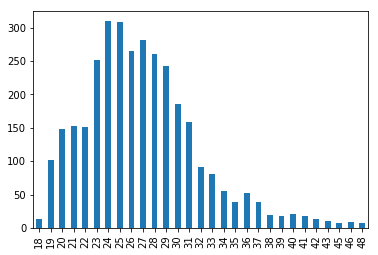

In [52]:
finhay_full['age'].value_counts()[0:29].sort_index().plot.bar()

## 23 - 31 is the range age that actively participated.

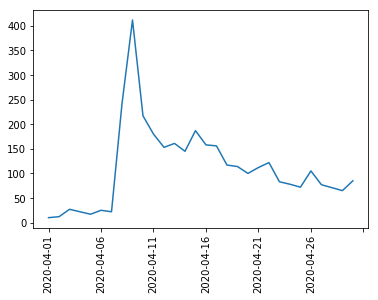

In [53]:
dtime=finhay_full.Date_join.dt.strftime('%Y-%m-%d')
dtime.value_counts().sort_values().sort_index().plot( rot=90)

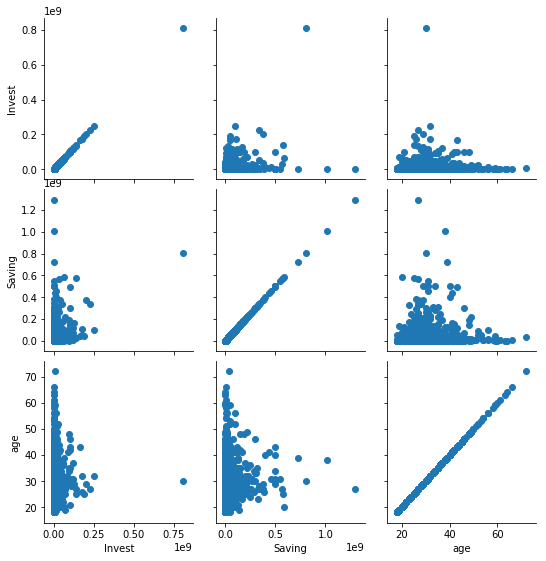

In [54]:
# Then you map to the grid
g = sns.PairGrid(finhay_full[['Invest','Saving','age']])
g.map(plt.scatter)

## The data is quite parsed, we cannot see clear the relationships between age saving and investment.

In [56]:
grouped = finhay_full.groupby("Gender")

In [57]:
grouped.size()

Gender
Female    2035
Male      1312
dtype: int64

In [58]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Female
(2035, 10)
<class 'pandas.core.frame.DataFrame'>
Male
(1312, 10)
<class 'pandas.core.frame.DataFrame'>


In [59]:
grouped["Invest"].size()

Gender
Female    2035
Male      1312
Name: Invest, dtype: int64

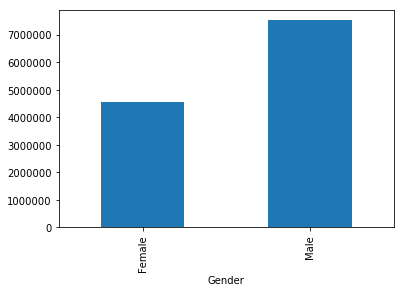

In [60]:
invest = grouped["Invest"].agg(np.mean)
invest.plot(kind="bar")

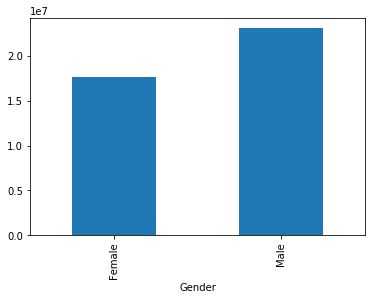

In [61]:
saving = grouped["Saving"].agg(np.mean)
saving.plot(kind="bar")

In [62]:
group = finhay_full.groupby(["Gender","age"])

In [143]:
import numpy as np
def trimmean(arr, percent=0.1):
    n = len(arr)
    k = int(round(n*(float(percent)/100)/2))
    return np.mean(arr[k+1:n-k])

In [215]:
group["Invest"].agg([trimmean, np.sum, np.std]).sort_values("sum",ascending = False)[0:20]

trimmean              sum           std
Gender age                                             
Female 30  12,183,500.20 1,305,134,521.00 77,942,254.54
Male   29  12,079,698.58 1,167,583,530.00 28,183,939.07
       27   9,883,086.35 1,127,462,739.00 27,091,810.38
Female 25   4,604,995.39   925,804,073.00 12,268,474.66
Male   28   7,715,882.00   872,194,666.00 16,865,962.68
       26   7,084,031.93   815,105,608.00 18,274,991.12
Female 28   5,406,428.99   784,032,204.00  8,961,947.73
Male   32  17,522,469.29   722,421,241.00 47,297,710.78
       25   6,657,394.91   699,076,476.00 19,892,123.31
Female 31   6,614,683.66   668,483,050.00 15,414,499.67
       27   3,841,539.30   660,944,759.00  7,148,165.80
       29   4,301,373.59   629,005,544.00  7,905,202.58
       24   3,011,146.96   616,062,832.00  4,455,847.42
       26   3,552,717.53   538,207,630.00  5,195,111.62
Male   31   9,296,448.38   521,601,109.00 18,700,548.72
Female 23   2,943,859.45   497,629,528.00  5,687,129.68
Male   30   6,390,874.60   497,067,344.00 14,133,381.19
       24   4,052,712.91   425,684,856.00  6,365,378.70
Female 21   3,631,638.84   397,821,995.00 11,545,929.79
Male   37  13,400,202.38   348,637,182.00 25,326,095.05

In [216]:
group["Invest"].agg([np.mean, np.sum, np.std]).sort_values("sum",ascending = False)[0:20]

mean              sum           std
Gender age                                             
Female 30  12,084,578.90 1,305,134,521.00 77,942,254.54
Male   29  12,162,328.44 1,167,583,530.00 28,183,939.07
       27  10,439,469.81 1,127,462,739.00 27,091,810.38
Female 25   4,583,188.48   925,804,073.00 12,268,474.66
Male   28   7,650,830.40   872,194,666.00 16,865,962.68
       26   7,150,049.19   815,105,608.00 18,274,991.12
Female 28   5,370,083.59   784,032,204.00  8,961,947.73
Male   32  17,200,505.74   722,421,241.00 47,297,710.78
       25   6,595,061.09   699,076,476.00 19,892,123.31
Female 31   6,553,755.39   668,483,050.00 15,414,499.67
       27   3,820,489.94   660,944,759.00  7,148,165.80
       29   4,278,949.28   629,005,544.00  7,905,202.58
       24   3,019,915.84   616,062,832.00  4,455,847.42
       26   3,564,288.94   538,207,630.00  5,195,111.62
Male   31   9,150,896.65   521,601,109.00 18,700,548.72
Female 23   2,962,080.52   497,629,528.00  5,687,129.68
Male   30   6,372,658.26   497,067,344.00 14,133,381.19
       24   4,015,894.87   425,684,856.00  6,365,378.70
Female 21   3,649,743.07   397,821,995.00 11,545,929.79
Male   37  12,912,488.22   348,637,182.00 25,326,095.05

In [211]:
group["Saving"].agg([np.mean, np.sum, np.std]).sort_values("sum",ascending = False)

mean              sum            std
Gender age                                               
Male   27   48,858,387.54 5,276,705,854.00 148,535,847.97
Female 25   17,892,384.49 3,614,261,666.00  48,909,681.34
       30   28,560,228.90 3,084,504,721.00  94,116,111.20
Male   29   30,510,446.89 2,929,002,901.00  70,694,713.37
       31   50,562,045.40 2,882,036,588.00 115,396,363.77
Female 27   16,233,448.24 2,808,386,546.00  26,856,909.79
       31   27,042,900.14 2,758,375,814.00  43,786,671.14
       29   17,526,418.82 2,576,383,567.00  23,957,653.40
       28   17,307,330.99 2,526,870,325.00  35,713,682.92
       26   16,449,275.84 2,483,840,652.00  40,074,694.06
       24   11,879,251.48 2,423,367,301.00  22,899,241.86
Male   26   19,456,584.36 2,218,050,617.00  39,833,675.95
       28   18,702,127.82 2,132,042,572.00  38,767,119.64
       30   21,791,803.68 1,699,760,687.00  47,499,552.51
Female 23    9,779,105.12 1,642,889,661.00  27,298,875.48
Male   25   13,321,639.01 1,412,093,735.00  19,886,965.28
Female 33   31,127,559.07 1,307,357,481.00  67,301,560.79
       20   12,266,243.67 1,238,890,611.00  58,560,372.37
Male   24   11,464,898.07 1,215,279,195.00  22,846,542.52
       38  150,854,544.25 1,206,836,354.00 349,678,150.54
       32   27,244,390.21 1,144,264,389.00  51,629,043.48
Female 21    9,997,998.00 1,089,781,782.00  21,826,925.70
       22    9,046,500.70   986,068,576.00  12,313,470.96
       32   20,010,266.57   980,503,062.00  37,502,572.16
Male   34   32,018,323.23   960,549,697.00  92,162,539.71
       35   41,464,836.18   912,226,396.00  55,661,681.96
       23   10,882,436.84   903,242,258.00  23,691,846.74
Female 39  134,931,207.83   809,587,247.00 287,608,446.96
       36   29,266,354.11   790,191,561.00  48,517,897.93
       35   45,211,354.88   768,593,033.00  80,383,658.64
       41   75,333,987.40   753,339,874.00 138,056,429.09
Male   33   16,135,037.46   629,266,461.00  28,214,286.16
       37   23,004,156.37   621,112,222.00  39,012,616.62
Female 34   24,196,705.84   604,917,646.00  57,750,622.71
Male   40   40,128,413.87   601,926,208.00 100,915,713.42
       43   96,904,467.00   581,426,802.00 196,291,255.89
Female 40   88,624,633.83   531,747,803.00 201,766,806.22
Male   36   16,381,144.42   425,909,755.00  19,894,320.60
Female 46   66,869,028.67   401,214,172.00 118,158,019.36
Male   48   71,584,836.80   357,924,184.00  88,316,337.39
Female 38   29,261,548.17   351,138,578.00  37,168,677.65
Male   22    7,711,775.67   323,894,578.00  14,554,429.25
       19    8,157,360.03   309,979,681.00  22,541,464.08
       39   24,127,890.50   289,534,686.00  36,088,464.14
       41   33,398,043.00   267,184,344.00  51,527,361.91
Female 19    4,081,225.08   261,198,405.00   7,433,235.74
Male   20    5,185,965.35   248,926,337.00   7,098,553.70
       21    5,452,540.93   239,911,801.00   9,123,925.38
Female 49  111,252,504.50   222,505,009.00 146,862,536.55
       42   34,442,884.67   206,657,308.00  57,513,405.40
       43   40,296,501.80   201,482,509.00  47,403,380.89
Male   42   22,682,904.38   181,463,235.00  38,133,352.05
Female 56  100,000,000.00   100,000,000.00            NaN
Male   52   93,000,000.00    93,000,000.00            NaN
       45   22,782,423.00    91,129,692.00  17,824,926.52
Female 18    9,080,087.44    81,720,787.00  16,232,107.81
       37    6,657,506.50    79,890,078.00   8,162,453.09
       44   20,944,537.33    62,833,612.00   5,170,651.38
       52   51,050,000.00    51,050,000.00            NaN
       53   50,334,409.00    50,334,409.00            NaN
       59   22,378,586.00    44,757,172.00  31,365,257.12
Male   72   32,089,611.00    32,089,611.00            NaN
       49   10,335,360.33    31,006,081.00   9,504,278.97
Female 48   15,004,241.00    30,008,482.00   7,065,070.13
Male   44    8,866,683.33    26,600,050.00   8,333,864.05
       56   11,505,826.00    23,011,652.00     711,485.19
       47   20,000,000.00    20,000,000.00            NaN
Female 45    3,836,

## the imbalance of gender or between saving and investment, all fluctuated a lot. In overall, women tend to save more than men. The most investment comes from men age-ranged 26-29, same range for women to save most.

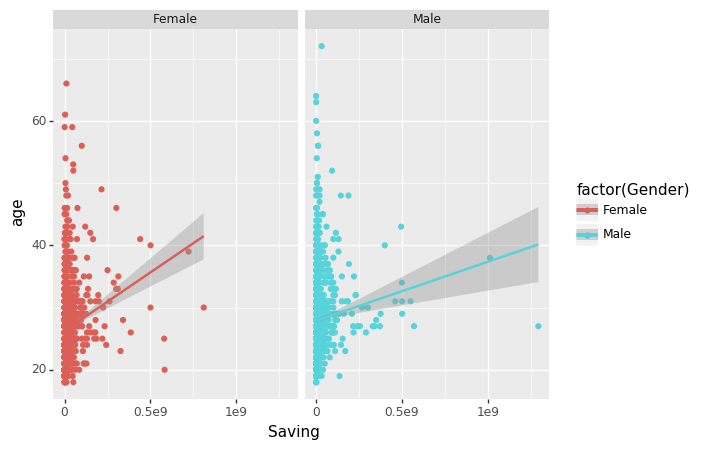

<ggplot: (8782777338757)>

In [134]:
(ggplot(finhay_full, aes('Saving', 'age', color='factor(Gender)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~Gender'))

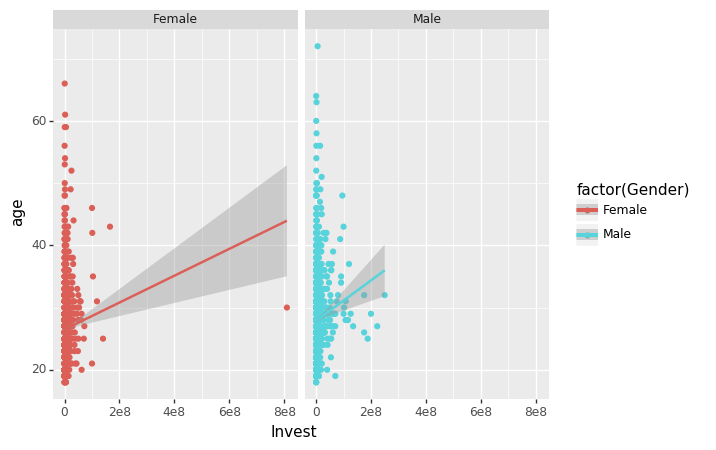

<ggplot: (8782756211865)>

In [135]:
(ggplot(finhay_full, aes('Invest', 'age', color='factor(Gender)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~Gender'))

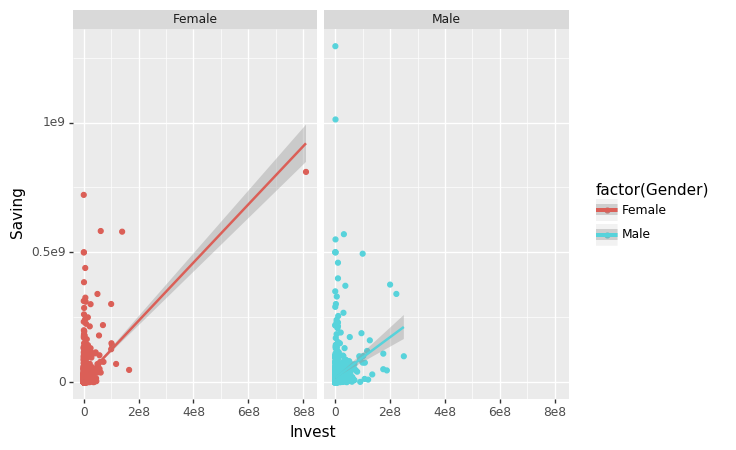

<ggplot: (8782721992741)>

In [136]:
(ggplot(finhay_full, aes('Invest', 'Saving', color='factor(Gender)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~Gender'))

##  The Saving and Investment are not related at all.

## Metric_1: Daily Active User.

In [64]:
# Copy to analyse
Customer_new = finhay_df.copy()

In [65]:
Customer_new['Date_join'] = pd.to_datetime(Customer_new['Date']).dt.date

In [66]:
Customer_Daily = Customer_new.groupby(["Date_join",'ID']).size().reset_index(name="Freq")

In [68]:
Customer_DAU = Customer_Daily.groupby(["Date_join"]).size().reset_index(name="Freq")
# Customer_Daily.sort_values('Freq',ascending=False)

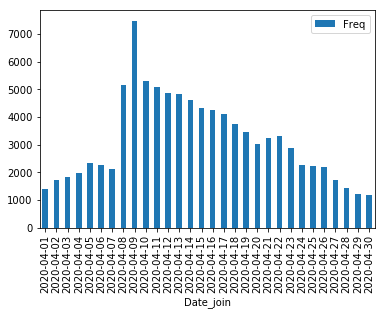

In [69]:
Customer_DAU.sort_index().plot("Date_join",kind='bar')

## On April 09, there was a jump in people signup and steady decline afterward.

In [70]:
Customer_new['Hour'] = pd.to_datetime(Customer_new['Date']).dt.hour

In [71]:
Customer_Hour = Customer_new.groupby(["Hour",'ID']).size().reset_index(name="Freq")

In [72]:
Customer_Hour = Customer_Hour.groupby(["Hour"]).size().reset_index(name="Freq")

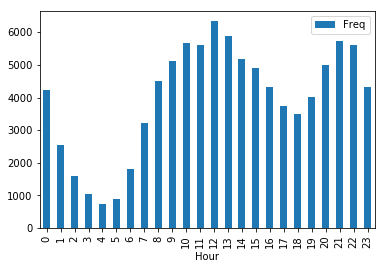

In [73]:
Customer_Hour.sort_index().plot("Hour",kind='bar')

## People usually signup at 10-15h and 20-22h.

In [145]:
Customer_new.head()

,ID,Invest,Saving,DoB,Gender,City,Date,Date_join,Hour
0,376723,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:01:55,2020-04-01,0
1,376724,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:02:24,2020-04-01,0
2,376725,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:07:50,2020-04-01,0
3,376726,NaN,NaN,1995-09-27,Male,Bình Dương,2020-04-01 00:10:43,2020-04-01,0
4,376727,NaN,NaN,NaN,NaN,NaN,2020-04-01 00:12:17,2020-04-01,0


In [151]:
def conditions(s):
    if (s['Hour'] >= 0 and s['Hour'] <=15):
        return 0
    else:
        return 1

In [153]:
Customer_new['Hour_range'] = Customer_new.apply(conditions, axis = 1)
(ggplot(finhay_full, aes('Saving', 'age', color='factor(Gender)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~Gender'))

In [183]:
Customer_new_full = Customer_new.dropna()

In [201]:
from plotnine import expand_limits,ggtitle,xlab,ylab,xlim,ylim,theme_bw

/Users/petern/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 691 rows containing missing values.


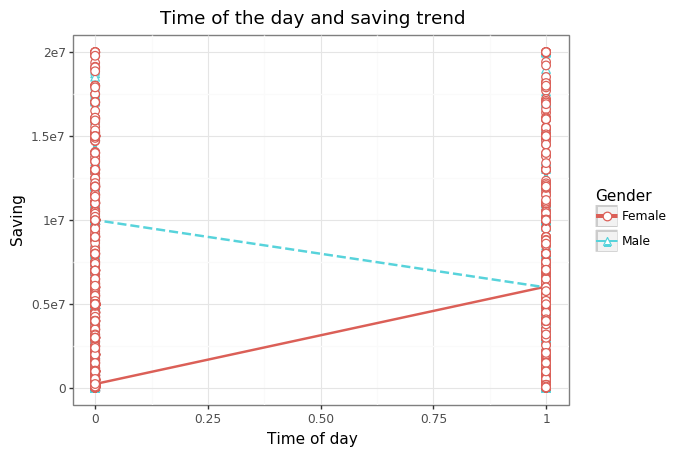

<ggplot: (8782742988805)>

In [209]:
(ggplot(Customer_new_full, aes('Hour_range', 'Saving', group='Gender',
    shape='Gender', colour='Gender')) +
  geom_line(aes(linetype='Gender'), size=1) +    
  geom_point(size=3, fill="white") +        
  expand_limits(y=0)   +  
  xlab("Time of day") + ylab("Saving")
  + xlim(0,1) + ylim(0, 20000000) +
  ggtitle("Time of the day and saving trend") +  
  theme_bw() )

/Users/petern/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 176 rows containing missing values.


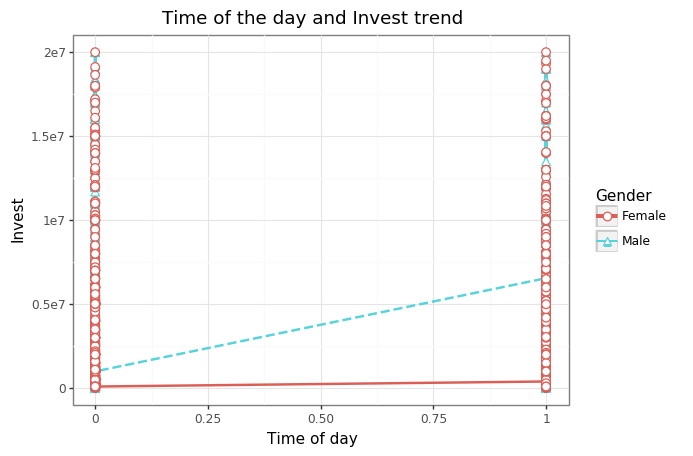

<ggplot: (8782743033781)>

In [210]:
(ggplot(Customer_new_full, aes('Hour_range', 'Invest', group='Gender',
    shape='Gender', colour='Gender')) +
  geom_line(aes(linetype='Gender'), size=1) +    
  geom_point(size=3, fill="white") +        
  expand_limits(y=0)   +  
  xlab("Time of day") + ylab("Invest")
  + xlim(0,1) + ylim(0, 20000000) +
  ggtitle("Time of the day and Invest trend") +  
  theme_bw() )

## Men usually make an investment decision after 15pm, Women tend to do saving decision at that time more than men after 15pm.

## Metric_2: City

In [213]:
df_location = finhay_df[finhay_df['City'].notna()]

In [214]:
df_location.shape

(22472, 7)

In [76]:
df_location.head()

,ID,Invest,Saving,DoB,Gender,City,Date
3,376726,NaN,NaN,1995-09-27,Male,Bình Dương,2020-04-01 00:10:43
5,376728,"600,000.00",NaN,1994-07-03,Male,Hà Nam,2020-04-01 00:12:55
6,376729,"600,000.00",NaN,1981-10-12,Female,Hà Nội,2020-04-01 00:13:04
8,376731,NaN,NaN,1989-05-24,Male,Cà Mau,2020-04-01 00:15:34
10,376733,"50,000.00",NaN,1993-10-05,Female,Hà Nội,2020-04-01 00:19:17


In [77]:
pd.unique(df_location.City)

array(['Bình Dương', 'Hà Nam', 'Hà Nội', 'Cà Mau', 'Hải Dương',
       'Kiên Giang', 'Bình Phước', 'Hồ Chí Minh', 'Hải Phòng',
       'Điện Biên', 'Vĩnh Long', 'Hoà Bình', 'Lào Cai', 'Nam Định',
       'Thừa Thiên Huế', 'Quảng Ninh', 'Hà Tĩnh', 'Thái Bình',
       'Bình Định', 'Sơn La', 'An Giang', 'Đồng Nai', 'Trà Vinh',
       'Vĩnh Phúc', 'Nghệ An', 'Khánh Hòa', 'Thanh Hóa', 'Lạng Sơn',
       'Bắc Ninh', 'Hưng Yên', 'Tây Ninh', 'Bắc Giang', 'Đắk Lắk',
       'Tiền Giang', 'Lâm Đồng', 'Sóc Trăng', 'Yên Bái', 'Bến Tre',
       'Cần Thơ', 'Phú Yên', 'Bạc Liêu', 'Quảng Ngãi', 'Hậu Giang',
       'Bà Rịa - Vũng Tàu', 'Bình Thuận', 'Thái Nguyên', 'Ninh Bình',
       'Bắc Kạn', 'Quảng Nam', 'Đà Nẵng', 'Tuyên Quang', 'Đồng Tháp',
       'Long An', 'Đắk Nông', 'Quảng Trị', 'Phú Thọ', 'Kon Tum',
       'Cao Bằng', 'Hà Giang', 'Ninh Thuận', 'Gia Lai', 'Quảng Bình',
       'Lai Châu'], dtype=object)

In [78]:
len(pd.unique(df_location.City))

63

In [79]:
Region_Daily = df_location.groupby(["Date","City"]).size().reset_index(name="Freq")

In [81]:
Region_daily = Region_Daily.groupby("City").agg("sum").reset_index()

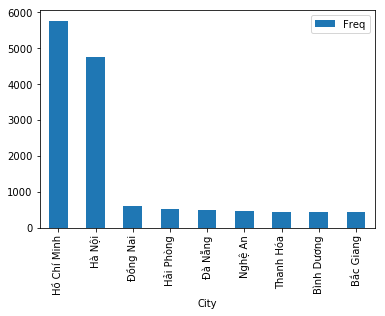

In [82]:
Region_daily.sort_values('Freq',ascending=False)[0:9].plot.bar("City")

## Here is the city that signup the most. We should investigate more to come to conclusion between 2 big city first to meet the needs of the two contries: HN and HCM

In [125]:
df_corr = finhay_full.copy()

In [126]:
df_corr.columns

Index(['ID', 'Invest', 'Saving', 'DoB', 'Gender', 'City', 'Date', 'Date_Birth', 'Date_join', 'age'], dtype='object')

In [127]:
df_corr.head()

,ID,Invest,Saving,DoB,Gender,City,Date,Date_Birth,Date_join,age
28,376751,"1,070,000.00","1,009,980.00",2000-09-19,Female,Kiên Giang,2020-04-01 00:36:22,2000-09-19,2020-04-01 00:36:22,20
86,376809,"4,970,000.00","3,870,293.00",1990-11-07,Male,Lào Cai,2020-04-01 01:47:44,1990-11-07,2020-04-01 01:47:44,30
160,376883,"20,012,165.00","20,000,000.00",1991-06-20,Male,Hà Nội,2020-04-01 05:48:42,1991-06-20,2020-04-01 05:48:42,29
591,377314,"1,255,000.00","50,000.00",1991-07-04,Male,Đồng Nai,2020-04-01 12:11:27,1991-07-04,2020-04-01 12:11:27,29
723,377446,"200,000.00","1,000,000.00",1995-07-12,Female,Cần Thơ,2020-04-01 13:16:39,1995-07-12,2020-04-01 13:16:39,25


## Correlation

In [128]:
df_corr['Gender']=(df_corr.Gender.astype('category').cat.codes)
df_corr['City']=(df_corr.City.astype('category').cat.codes)

In [130]:
df_num = df_corr.select_dtypes(include =['float64','int64','int8'])
df_num = df_num[df_num.columns.drop(list(df_num.filter(like = 'Key',axis = 1)))]
df_num.columns

Index(['ID', 'Invest', 'Saving', 'Gender', 'City', 'age'], dtype='object')

In [131]:
df_num.head()

,ID,Invest,Saving,Gender,City,age
28,376751,"1,070,000.00","1,009,980.00",0,26,20
86,376809,"4,970,000.00","3,870,293.00",1,30,30
160,376883,"20,012,165.00","20,000,000.00",1,18,29
591,377314,"1,255,000.00","50,000.00",1,61,29
723,377446,"200,000.00","1,000,000.00",0,13,25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce3048e510>,
      dtype=object)

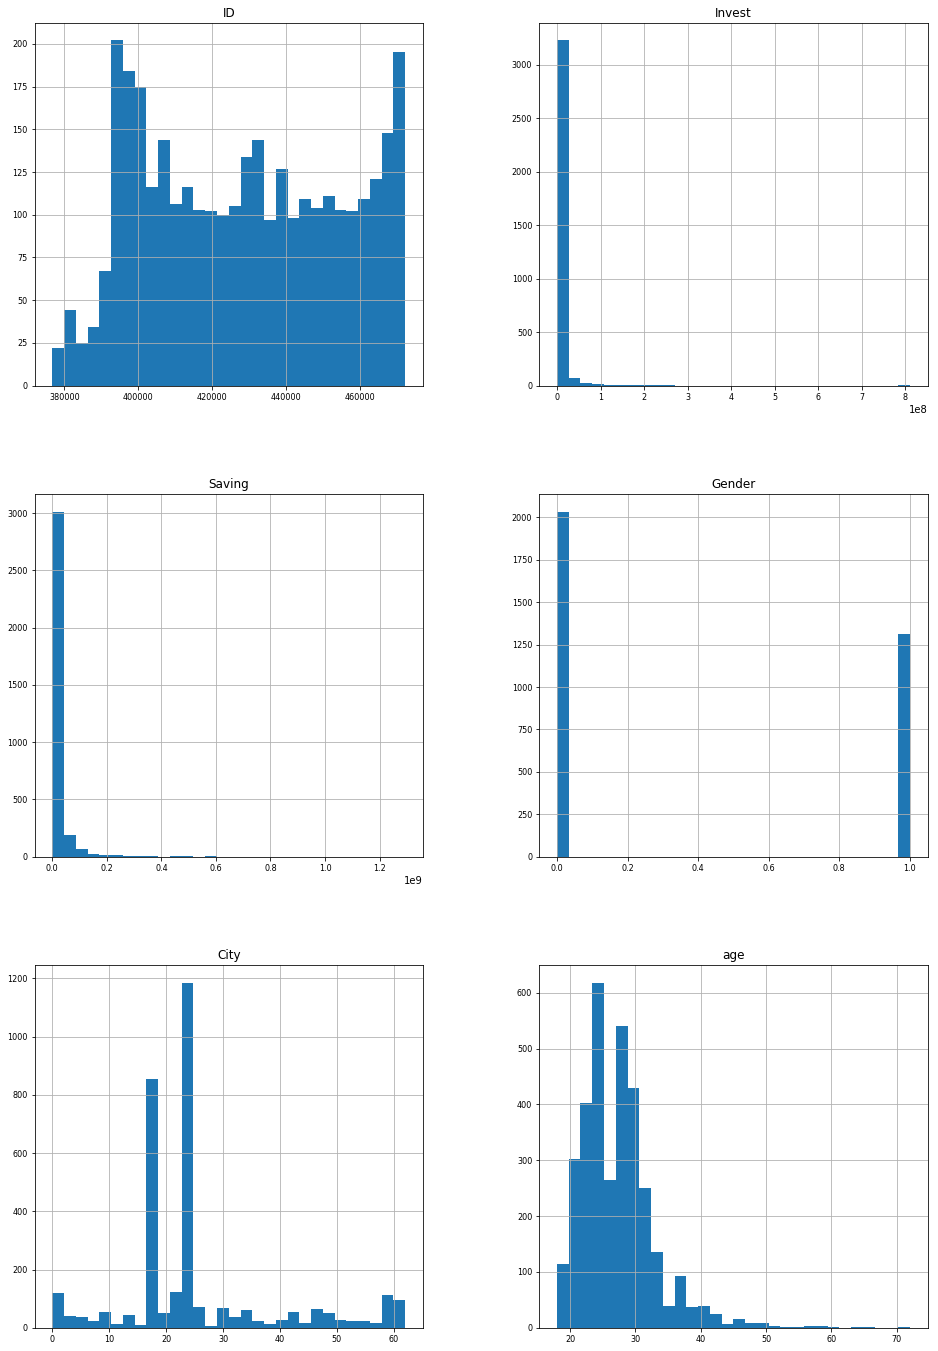

In [132]:
df_num.hist(figsize=(16,24), bins =30 , xlabelsize=8, ylabelsize=8)

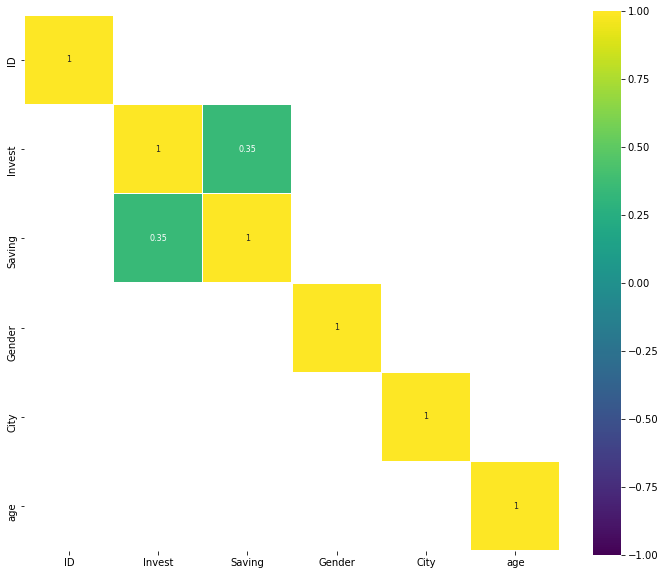

In [133]:
corr = df_num.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[(corr>=0.3)|(corr<=-0.3)],cmap='viridis',
            vmax = 1.0,vmin=-1.0, linewidths=0.1,
            annot=True,annot_kws={'size':8},square = True)

## Here we don't see any significant correlations because of few attributes. For more informations, we could do more analysis and building models to find out more interesting insights.

## Recommended atrribute: date_time of making investment or saving, you could follow my CV to see the documents needed to learn the behaviour of users.

# Thank for reading through my analysis. Hope to cooperate with you in the near future.